# 2.6 概率

In [17]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [18]:
fair_prob = torch.ones([6])/6
multinomial.Multinomial(1,fair_prob).sample()

tensor([0., 0., 0., 0., 0., 1.])

In [19]:
multinomial.Multinomial(10,fair_prob).sample()

tensor([1., 3., 2., 2., 2., 0.])

In [20]:
counts = multinomial.Multinomial(1000,fair_prob).sample()
counts/1000

tensor([0.1810, 0.1690, 0.1520, 0.1610, 0.1700, 0.1670])

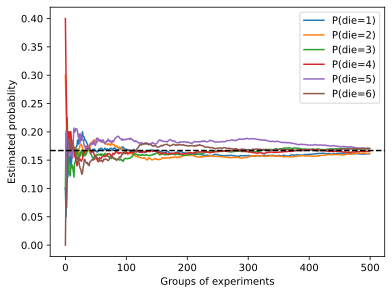

In [21]:
counts = multinomial.Multinomial(10,fair_prob).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts /cum_counts.sum(dim=1,keepdim=True)

d2l.set_figsize((6,4.5))

for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(),label = ("P(die=" + str(i+1) + ")" ))

d2l.plt.axhline(y = 0.167,color = 'black',linestyle = 'dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probablity')
d2l.plt.legend()